# Basic Probability Calculations

In [1]:
# define a function that would give you a 2D distribution. Do not pick a Gaussian.

# define a prior box:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import dblquad
from scipy.integrate import quad
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from scipy.stats import norm



L1 = 1
L2 = 5
def pdf(x, y, lambda1, lambda2, N):
    
    # Compute the unnormalized PDF
    pdf_unnormalized = np.exp(-(x-0.5)**4 / lambda1 - y**4 / lambda2)

    return pdf_unnormalized/N


# define prior box: definisco la funzione nel box di estremi a,b; c,d
a = 4
b = -4
c = 4
d = -4

In [3]:
# sample your reference probability on a 2D regular grid in the prior box
# Generate grid points
x = np.linspace(b, a, 100)
y = np.linspace(d, c, 100)
X, Y = np.meshgrid(x, y)

Z = pdf(X, Y, L1, L2, 1)
print(Z)

[[4.74505817e-201 1.34193147e-188 8.21450285e-177 ... 6.63485518e-077
  2.54837839e-082 3.91567678e-088]
 [2.62639532e-199 7.42760657e-187 4.54673706e-175 ... 3.67240020e-075
  1.41053046e-080 2.16733174e-086]
 [1.14268746e-197 3.23159003e-185 1.97818638e-173 ... 1.59778143e-073
  6.13691115e-079 9.42958886e-085]
 ...
 [1.14268746e-197 3.23159003e-185 1.97818638e-173 ... 1.59778143e-073
  6.13691115e-079 9.42958886e-085]
 [2.62639532e-199 7.42760657e-187 4.54673706e-175 ... 3.67240020e-075
  1.41053046e-080 2.16733174e-086]
 [4.74505817e-201 1.34193147e-188 8.21450285e-177 ... 6.63485518e-077
  2.54837839e-082 3.91567678e-088]]


In [4]:
# normalize the pdf
x_lower = -np.inf  # Lower limit of integration for x
x_upper = np.inf
y_lower = -np.inf
y_upper = np.inf


# perform the double integration
N, _ = dblquad(pdf, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper, args=(L1,L2,1))   # args è utile per passare i parametri della funzione pdf
print('integrale pdf non norm = ',N)


integral2, __ = dblquad(pdf, x_lower, x_upper, lambda x: y_lower, lambda x: y_upper, args=(L1,L2,N))
print('integrale pdf_norm = ' , integral2)

integrale pdf non norm =  4.914107579867702
integrale pdf_norm =  0.9999999999997071


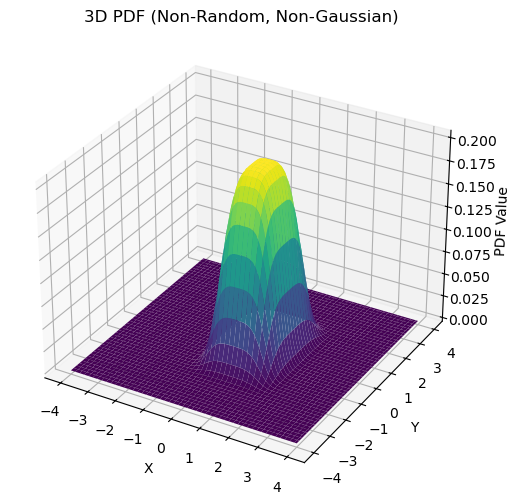

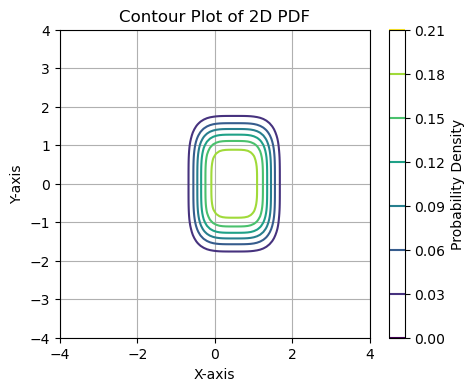

In [5]:
# contour plot the distribution (on generic iso-contours, the default ones work)


Z1 = pdf(X, Y, L1, L2, N)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z1, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF Value')
ax.set_title('3D PDF (Non-Random, Non-Gaussian)')

# Show plot
plt.show()


# Plot Contour
plt.figure(figsize=(5, 4))
plt.contour(x, y, Z1, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot of 2D PDF')
plt.colorbar(label='Probability Density')
plt.grid(True)
plt.show()

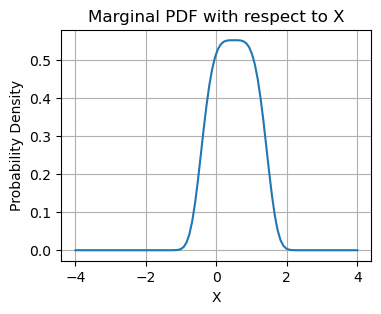

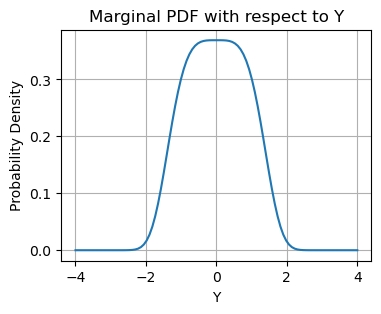

In [6]:
# marginalize the distribution and get two 1D distributions. Plot them.

def marginal_pdf_X(x, lambda1, lambda2, N):
    # Define the integrand for marginalizing with respect to Y
    integrand = lambda y: pdf(x, y, lambda1, lambda2, N)
    # Integrate the joint pdf over all possible values of Y
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

def marginal_pdf_Y(y, lambda1, lambda2, N):
    # Define the integrand for marginalizing with respect to X
    integrand = lambda x: pdf(x, y, lambda1, lambda2, N)
    # Integrate the joint pdf over all possible values of X
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

# Define the range of Y values you're interested in
y_values = y

# Define the range of X values you're interested in
x_values = x


# Calculate the marginal pdf with respect to X for each value of X
marginal_pdf_X_values = [marginal_pdf_X(x, L1, L2, N) for x in x_values]

# Calculate the marginal pdf with respect to Y for each value of Y
marginal_pdf_Y_values = [marginal_pdf_Y(y, L1, L2, N) for y in y_values]


# plot
plt.figure(figsize=(4, 3))
plt.plot(x_values, marginal_pdf_X_values)
plt.title('Marginal PDF with respect to X')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))
plt.plot(y_values, marginal_pdf_Y_values)
plt.title('Marginal PDF with respect to Y')
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


In [7]:
# check that marginalization does not alter the normalization of the pdf: normalizzo pdf(y)

integrand_x = lambda x: marginal_pdf_X(x, L1, L2, N)
int_x, _ = quad(integrand_x, -np.inf, np.inf) 

integrand_y = lambda y: marginal_pdf_Y(y, L1, L2, N)
int_y, _ = quad(integrand_y, -np.inf, np.inf) 

print('norma di PDF(X) = ', int_x)
print('norma di PDF(Y) = ', int_y)


norma di PDF(X) =  1.0000000000002995
norma di PDF(Y) =  0.9999999999997071


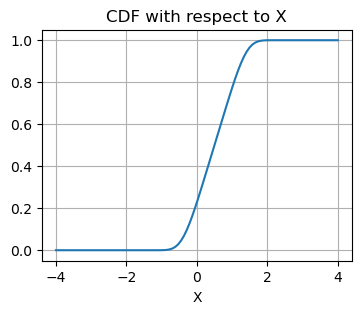

In [8]:
# calculate the cumulative distribution function of the 1D distribution. Plot it.
def cdf_x(t, lambda1, lambda2, N):
    integrand = lambda x: marginal_pdf_X(x, lambda1, lambda2, N)
    result, _ = quad(integrand, -np.inf, t)
    return result

def cdf_y(t, lambda1, lambda2, N):
    integrand = lambda y: marginal_pdf_Y(y, lambda1, lambda2, N)
    result, _ = quad(integrand, -np.inf, t)
    return result

# valori della cdf_x per il plot
cdf_values = [cdf_x(x, L1, L2, N) for x in x_values]

plt.figure(figsize=(4, 3))
plt.plot(x_values, cdf_values)
plt.title('CDF with respect to X')
plt.xlabel('X')
plt.ylabel('')
plt.grid(True)
plt.show()


In [9]:
# calculate the mean, median and mode. Add them to the plot.
# ? faccio i conti per F(x) ?

integrand_Mean_x = lambda x: x*marginal_pdf_X(x, L1, L2, N) #definizione di media
Mean_X, _ = quad(integrand_Mean_x, -np.inf, np.inf)
print('media sulle x: ',Mean_X)


# ? faccio i conti per F(x) ?

integrand_Mean_y = lambda y: y*marginal_pdf_Y(y, L1, L2, N)
Mean_Y, _ = quad(integrand_Mean_y, -np.inf, np.inf)
print('media sulle y: ',Mean_Y)


mediana_x = minimize_scalar(lambda x: (cdf_x(x, L1, L2, N) - 0.5))
print('mediana per distribuzione marginalizzata rispetto alle y: ', mediana_x.x)

mediana_y = minimize_scalar(lambda y: (cdf_y(y, L1, L2, N) - 0.5))
print('mediana per distribuzione marginalizzata rispetto alle x: ', mediana_y.x)


# Moda:

def negative_pdf(args):
    x, y = args
    return -pdf(x, y, L1, L2, N)


# Initial guess for mode
initial_guess = [0.0, 0.0]

# Find mode using optimization
result = minimize(negative_pdf, initial_guess, method='Nelder-Mead')
mode_x, mode_y = result.x

print("Mode (x, y):", mode_x, mode_y)
print("PDF value at mode:", pdf(mode_x, mode_y, L1, L2, N))


# plot???



media sulle x:  0.5000000000002958
media sulle y:  0.0
mediana per distribuzione marginalizzata rispetto alle y:  -8.472135885712024
mediana per distribuzione marginalizzata rispetto alle x:  -16.959169111814735
Mode (x, y): 0.5000383455640409 4.047490479190823e-05
PDF value at mode: 0.20349574846444898


varianza della distribuzione 0.18365326953103533


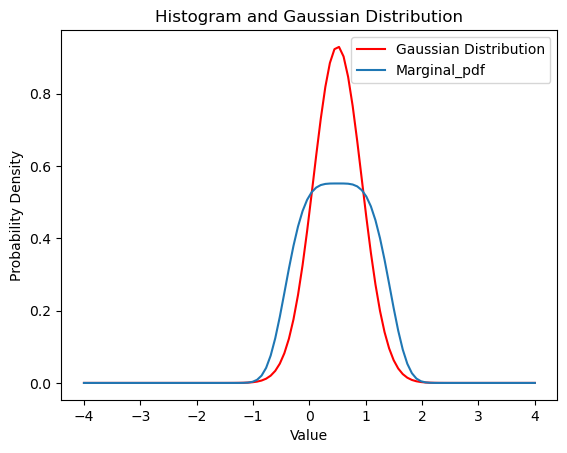

In [16]:
# calculate the variance of the 1D distribution. Add to the plot the Gaussian approximation of your distribution.

sum = 0
i = 0
for xx in x_values:
    sum = sum + (marginal_pdf_X(xx, L1, L2, N)-Mean_X)**2
    i = i + 1
var = sum/i
print('varianza della distribuzione', var )


gaussian = norm.pdf(x_values, Mean_X, (var)**(1/2))


# Plot Gaussian distribution
plt.plot(x, gaussian, 'r-', label='Gaussian Distribution')
plt.plot(x_values, marginal_pdf_X_values, label = 'Marginal_pdf')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram and Gaussian Distribution')
plt.legend()

# Show plot
plt.show()


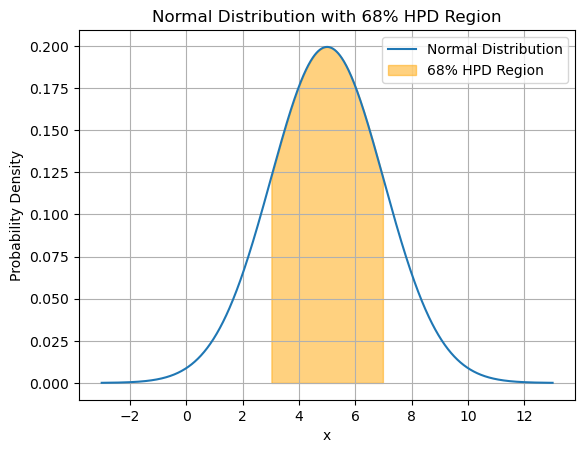

Lower bound of HPD region: 3.011084233580494
Upper bound of HPD region: 6.988915766419506
Width of HPD region: 3.977831532839012


In [21]:
# calculate and plot the 68% HPD region for the 1D distribution. Plot it.


# Define parameters for the normal distribution
mu = 5
sigma = 2

# Calculate the 68% HPD region using the cumulative distribution function (CDF)
lower_bound = norm.ppf(0.16, mu, sigma)
upper_bound = norm.ppf(0.84, mu, sigma)
hpd_width = upper_bound - lower_bound

# Generate data for the normal distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf_values = norm.pdf(x, mu, sigma)

# Plot the normal distribution
plt.plot(x, pdf_values, label='Normal Distribution')

# Highlight the 68% HPD region
plt.fill_between(x, pdf_values, where=(x >= lower_bound) & (x <= upper_bound), color='orange', alpha=0.5, label='68% HPD Region')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution with 68% HPD Region')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

print("Lower bound of HPD region:", lower_bound)
print("Upper bound of HPD region:", upper_bound)
print("Width of HPD region:", hpd_width)


In [12]:
# make a 2D contour plot of the 2D 68% HPD region. How does it relate to the 1D region?